## Text processing: Wizard of Oz by L. Frank Baum from Project Gutenberg

Assignment:

Use Wizard of Oz book from project Gutenberg https://www.gutenberg.org/ebooks/25519 .

1) Create a three functions:

- read(filepath): Given the path to your downloaded text file, this function reads from disk and returns it as a string.
- extract(raw_text):  Given the raw text read in from the text file, this function removes the header and footer and returns only the contents of the original book.  Use regular expressions to perform this task.
- tokenize(book_text):  Given the text of the book, this function changes the text to lower case, removes punctuation and stop words, then preforms stemming or lemmatization  

2) Inspect terms that appear less than 50 times in the entire book.

3) Create a plot of the frequency distribution of the words in the text.  What does the this plot tell us? Create another plot of the cumulative frequency distribution.

Bonus: Create another plot and take out the stopwords. How does this plot compare to the plot with stop words?  Which one is more appropriate for Zipfian analysis?

## Imports

In [1]:
import re #Regex
from nltk.tokenize import sent_tokenize, word_tokenize #Tokeningation
from nltk.corpus import stopwords #stop words
import string #string operations
from nltk.stem import WordNetLemmatizer #Lemmatization
from collections import Counter #Word counters
import matplotlib.pyplot as plt #Plotting
from nltk import FreqDist #Frequency distribution

### Functions

In [2]:
#Function reading file from the disk and returning it as a string
def read(filepath):
    with open(filepath) as f:
        raw = f.read()
    return raw

In [3]:
#Function receiving raw text as input, removing header and footer and returning the content of the original book
def extract(raw_text):
    regex = re.compile(r'\*\*\*(START|END)(.*)\*\*\*') #compile regex
    regex.findall(raw_text) #find all lines starting with ***START or ***END
    #find location of the strings marking the beginning and the end of the book
    mo = regex.search(raw_text) #match object for the first string
    start = mo.end() + 1  #Start where the ***START OF THE BOOK String ends
    mo = regex.search(raw_text, pos=start) #Perform second search begining where the first search ended 
    #mo (match object) contains the second string
    end = mo.start() #mark end of the main text at the begginning of the second string
    # slice out the content of the book (text between the two strings)
    book = raw_text[start:end+1] #book contains the main text
    return book


In [4]:
#Function that  received text of the book, tokenizes, changes words to lower case
#removes punctuation and stop words, and performs lemmatization
def tokenize_nostops(book_text):
    #tokenize the book into words
    tokens = word_tokenize(book_text)
    #change to lower casev
    tokens_lower = [word.lower() for word in tokens]
    # remove punctation 
    string.punctuation
    tokens_nopunct = [word for word in tokens_lower if word not in string.punctuation]
    #remove stop words
    stop_words = stopwords.words('english') #list of stop words
    tokens_nostop = [word for word in tokens_nopunct if word not in stop_words]
    #Lemmatization
    wnl = WordNetLemmatizer()
    tokens_nostop_lem  = [wnl.lemmatize(word) for word in tokens_nostop]
    return tokens_nostop_lem


In [5]:
#Function that  received text of the book, tokenizes, changes words to lower case
#removes punctuation, and performs lemmatization
#Note: Stop words are not removed, but all other steps are similar to the tokenize_nostops() function above 
def tokenize_withstops(book_text):
    #tokenize the book into words
    tokens = word_tokenize(book_text)
    #change to lower casev
    tokens_lower = [word.lower() for word in tokens]
    # remove punctation 
    string.punctuation
    tokens_nopunct = [word for word in tokens_lower if word not in string.punctuation]
    #Lemmatization
    wnl = WordNetLemmatizer()
    tokens_withstops_lem  = [wnl.lemmatize(word) for word in tokens_nopunct]
    return tokens_withstops_lem


# Text Processing

In [6]:
# path to the text file relative to the python script file 
filepath = 'wizard-of-oz.txt'
#Read the file from the disk
raw=read(filepath) #Call the read() function
#Display a slice of the text to make sure it is loaded correctly
raw[:800]

'ï»¿The Project Gutenberg eBook, Little Wizard Stories of Oz, by L. Frank\nBaum, Illustrated by John R. Neill\n\n\nThis eBook is for the use of anyone anywhere at no cost and with\nalmost no restrictions whatsoever.  You may copy it, give it away or\nre-use it under the terms of the Project Gutenberg License included\nwith this eBook or online at www.gutenberg.org\n\n\n\n\n\nTitle: Little Wizard Stories of Oz\n\n\nAuthor: L. Frank Baum\n\n\n\nRelease Date: May 19, 2008  [eBook #25519]\n\nLanguage: English\n\nCharacter set encoding: ISO-646-US (US-ASCII)\n\n\n***START OF THE PROJECT GUTENBERG EBOOK LITTLE WIZARD STORIES OF OZ***\n\n\nE-text prepared by Chris Curnow, Joseph Cooper, Greg Bergquist, and the\nProject Gutenberg Online Distributed Proofreading Team\n(http://www.pgdp.net)\n\n\n\nNote: Project Gutenberg also has an HT'

In [7]:
#Extract the main text of the book from the file
book_text=extract(raw) 
#Display a slice of the text to validate the result
book_text[:800]

'\n\nE-text prepared by Chris Curnow, Joseph Cooper, Greg Bergquist, and the\nProject Gutenberg Online Distributed Proofreading Team\n(http://www.pgdp.net)\n\n\n\nNote: Project Gutenberg also has an HTML version of this file which\n      includes the many lovely original colored illustrations.\n      See 25519-h.htm or 25519-h.zip:\n      (http://www.gutenberg.net/dirs/2/5/5/1/25519/25519-h/25519-h.htm)\n      or\n      (http://www.gutenberg.net/dirs/2/5/5/1/25519/25519-h.zip)\n\n\n\n\n\n[Illustration: THIS BOOK BELONGS TO]\n\n[Illustration]\n\nLITTLE WIZARD STORIES OF OZ\n\nby\n\nL. FRANK BAUM\n\nIllustrated by John R. Neill\n\n\n\n\n\n\n\nLittle\nWizard\nStories\nof Oz\n\n\n\n\nContents\n\n\n  The Cowardly Lion and the Hungry Tiger       15\n\n  Little Dorothy and Toto                      39\n\n  Tiktok and the Nome King                  '

In [8]:
#Text cleaning - resulting list of tokens without stop words
cleantokens_nostops = tokenize_nostops(book_text)
#Display partial results to check correctness
cleantokens_nostops[100:150]

['hour',
 'day',
 'sits',
 'throne',
 'glistening',
 'emerald',
 'listens',
 'trouble',
 'people',
 'sure',
 'tell',
 'around',
 'ozma',
 "'s",
 'throne',
 'occasion',
 'grouped',
 'important',
 'personage',
 'oz',
 'scarecrow',
 'jack',
 'pumpkinhead',
 'tiktok',
 'clockwork',
 'man',
 'tin',
 'woodman',
 'wizard',
 'oz',
 'shaggy',
 'man',
 'famous',
 'fairy',
 'people',
 'little',
 'dorothy',
 'usually',
 'seat',
 'ozma',
 "'s",
 'foot',
 'crouched',
 'either',
 'side',
 'throne',
 'two',
 'enormous',
 'beast',
 'known']

In [9]:
#Perform similar text cleaninng but keep the stop word in
cleantokens_with_stops = tokenize_withstops(book_text)
#Display partial results to check correctness
cleantokens_with_stops[100:150]

['and',
 'the',
 'sawhorse',
 '111',
 'the',
 'scarecrow',
 'and',
 'the',
 'tin',
 'woodman',
 '135',
 'illustration',
 'the',
 'cowardly',
 'lion',
 'and',
 'the',
 'hungry',
 'tiger',
 'in',
 'the',
 'splendid',
 'palace',
 'of',
 'the',
 'emerald',
 'city',
 'which',
 'is',
 'in',
 'the',
 'center',
 'of',
 'the',
 'fairy',
 'land',
 'of',
 'oz',
 'is',
 'a',
 'great',
 'throne',
 'room',
 'where',
 'princess',
 'ozma',
 'the',
 'ruler',
 'for',
 'an']

In [10]:
## Filtering words by number of occurances
# find values less than 50 for the list without stops
counter1 = Counter(cleantokens_nostops)
lt1_50 = [(k, v) for k, v in counter1.items() if v < 50]

In [11]:
# find values less than 50 for the list with stop words
counter2 = Counter(cleantokens_with_stops)
lt2_50 = [(k, v) for k, v in counter2.items() if v < 50]

In [12]:
#for the list without stop words
# sort the list of tuples by value (#of occurances, pair[1]), not the word (pair[0])
sorted_lt1_50 = sorted(lt1_50, key=lambda tup: tup[1], reverse=True) #sort on the value, second element of the tuple, reverse order

In [13]:
#Display sample contenct of the sorted list (reverse order)
#Words occurring less than 50 times, stop words are excluded
sorted_lt1_50[:30]

[('man', 45),
 ('ozma', 43),
 ('head', 42),
 ('scarecrow', 40),
 ('king', 38),
 ('would', 37),
 ('tin', 36),
 ("n't", 36),
 ('jack', 33),
 ('oz', 32),
 ('dorothy', 32),
 ('upon', 32),
 ('lion', 31),
 ('tiktok', 31),
 ('tiger', 30),
 ('could', 28),
 ('--', 28),
 ('imp', 27),
 ("'m", 26),
 ('girl', 25),
 ('good', 25),
 ('eye', 25),
 ('tree', 25),
 ('nome', 23),
 ('woodman', 21),
 ('two', 21),
 ('friend', 21),
 ('baby', 21),
 ('made', 21),
 ('sawhorse', 20)]

In [14]:
#for the list with stop words
# sort by value (number of occurances, pair[1]), not the word (pair[0])
sorted_lt2_50 = sorted(lt2_50, key=lambda tup: tup[1], reverse=True) #sort on the value, second element of the tuple, reverse order

In [15]:
#Display sample contenct of the sorted list (reverse order)
#Words occurring less than 50 times, stop words are NOT excluded
sorted_lt2_50[:30]

[('is', 47),
 ('on', 47),
 ('she', 47),
 ('their', 46),
 ('be', 46),
 ('then', 46),
 ('my', 46),
 ('all', 45),
 ('are', 45),
 ('man', 45),
 ('him', 45),
 ('her', 44),
 ('up', 44),
 ('ozma', 43),
 ('head', 42),
 ('them', 42),
 ('scarecrow', 40),
 ('this', 38),
 ('king', 38),
 ('no', 37),
 ('would', 37),
 ('were', 37),
 ('out', 37),
 ('tin', 36),
 ('do', 36),
 ("n't", 36),
 ('now', 36),
 ('me', 35),
 ('will', 34),
 ('jack', 33)]

As the output above shows, the list of the words occurring less than 50 times in the text (stop words excluded), allows us to make conclusions about the main topic of the text. The top of the list sorted in reverse order displays the words that have a medium frequency in the text. They are not constantly repeated service words, but not unique words used only once either. As a result, the list contains names of the main characters, places etc. that describe the text the best. On the other hand, the second list of the words with stop words included is not very descriptive, as it still contains mostly pronouns and verb forms. 

In [16]:
# create a frequency distribution - no stop words
fd1 = FreqDist(cleantokens_nostops)

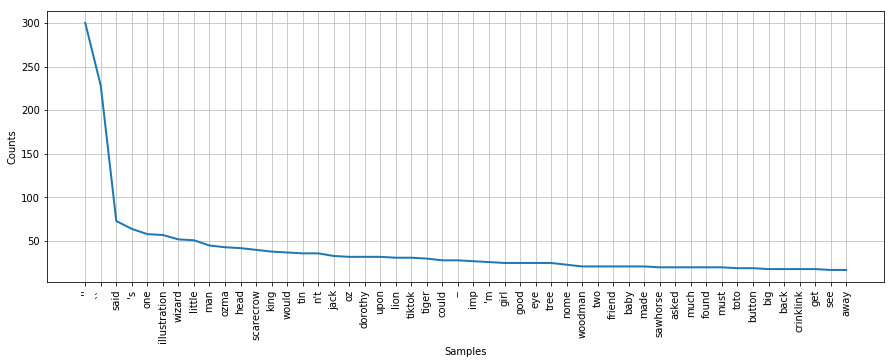

In [17]:
# plot frequency distribution - no stop words
plt.figure(figsize=(15, 5))
fd1.plot(50)

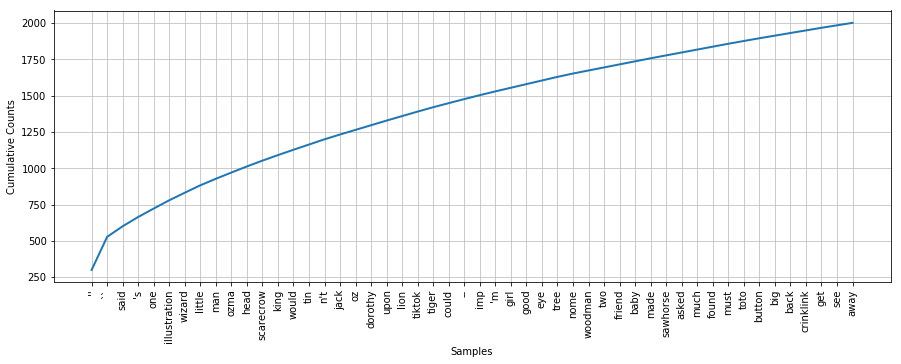

In [18]:
# change the cummulative parameter to False 
# plot frequency distribution - no stop words
plt.figure(figsize=(15, 5))
fd1.plot(50, cumulative=True)

In [19]:
# create a frequency distribution - with stop words
fd2 = FreqDist(cleantokens_with_stops)

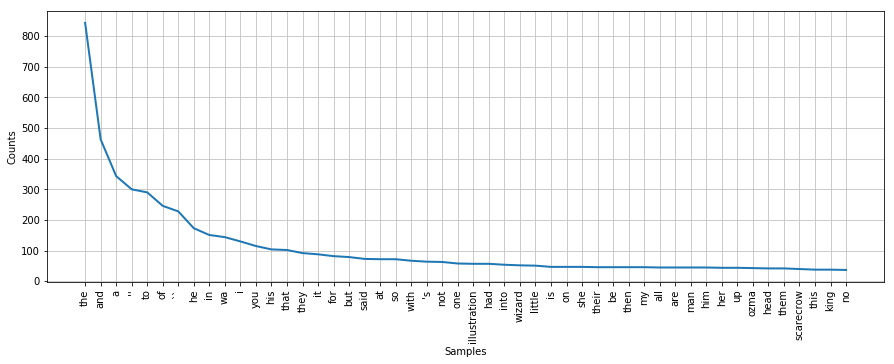

In [20]:
# plot frequence distribution- with stop words
plt.figure(figsize=(15, 5))
fd2.plot(50)

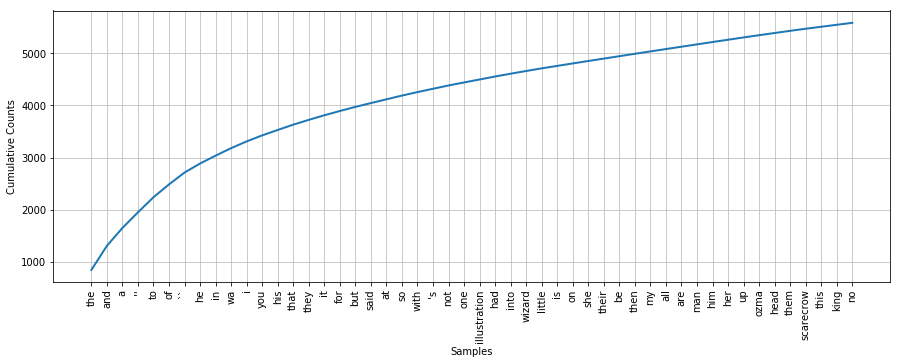

In [21]:
# change the cummulative parameter to False
# plot cumulative efrequencey distribution - with stop words
plt.figure(figsize=(15, 5))
fd2.plot(50, cumulative=True)

Both cumulative frequency distribution plots (with and without stop words) have much steeper incline at the beginning which corresponds to a higher individual contribution of the most popular words into cumulative counts of all word in the text. The graph starts to even out and approach almost a horizontal line if we include more words in it (>1000). 

For example, if we include stop words in the analysis, the most popular word is "the"  and the second most popular "and"  is used 1/2 as often as "the". The third popular - "a" is used approximately 1/3 as often as "the". However, this relative distribution (including stop words) does not add any additional information about the particular "Wizard of Oz" text being analyzed as it contains mostly non-desriptive words.

The graph representing the most popular words excluding stop words might provide more interesting information for the analysis, but it is more sensitive to the quality of text pre-processing. In our example, some additional steps are needed to exclude double dashes, apostrophes, one letter abbreviations that seem to be typos in the input text etc. (e.g., token n't) that were not picked up by the clean-up function because of their incorrect use in the original text.